In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-dark')
df = pd.read_csv('data/normalized.csv')
display(df.shape)
display(df.head())

(636427, 15)

,timeRead,timeDelete,id,totalTime,timestamp,serverType,clientTotalTime,requestSize,frequency,instanceType,freeMem,timeWrite,databaseType,totalMem,memUsage
0,117.0,101.0,ACPPqr7Uh,470.0,1.585877e+12,java,601.0,1.0,1.0,b1,1.883013e+09,159.0,nosql,2.147484e+09,0.123154
1,46.0,146.0,fHKVs8SiC,477.0,1.585877e+12,java,617.0,1.0,1.0,b1,1.882862e+09,179.0,nosql,2.147484e+09,0.123224
2,33.0,72.0,L2V71vHyZ,421.0,1.585877e+12,java,550.0,1.0,1.0,b1,1.882726e+09,175.0,nosql,2.147484e+09,0.123287
3,47.0,79.0,ASaJPUMQk,442.0,1.585877e+12,java,578.0,1.0,1.0,b1,1.882567e+09,235.0,nosql,2.147484e+09,0.123362
4,58.0,87.0,0-o3JCBrZ,443.0,1.585877e+12,java,837.0,1.0,1.0,b1,1.882399e+09,179.0,nosql,2.147484e+09,0.123440


In [2]:
servers = sorted(['java', 'nodejs'])
databases = sorted(['nosql', 'sql'])
instances = sorted(['b1', 'b2', 'b4', 'b8'])

combinations = [(servers[0], databases[0]), (servers[1], databases[0]), (servers[0], databases[1]), (servers[1], databases[1])]

sizes = sorted(list(df['requestSize'].unique()))
frequencies = sorted(list(df['frequency'].unique()))

In [3]:
def plot_request_sizes(metric):
    fig, ax = plt.subplots(2, 2)

    row = 0
    col = 0
    for instance in instances:
        for combination in combinations:
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database) & (df[metric] != -1)]
            unique_sizes = sorted(list(partial['requestSize'].unique()))

            x_vals = []
            y_vals = []

            for size in unique_sizes:
                partial_sizes = partial.loc[df['requestSize'] == size]

                if (partial_sizes.shape[0] > 0):
                    x_vals.append(size)
                    y_vals.append(partial_sizes[metric].mean())

            if (combination[0] == 'java'):
                color = 'orange'
            else:
                color = 'green'

            if (combination[1] == 'sql'):
                linestyle = '-.'
            else:
                linestyle = '-'


            ax[row][col].plot(x_vals, y_vals, linestyle=linestyle, color = color, label='{} - {} {}'.format(instance, combination[0], combination[1]))

        ax[row][col].set_ylim(0)
        ax[row][col].set_xticks(sizes)
        ax[row][col].set_title('Payload Size Analysis - {} {}'.format(instance.upper(), metric), fontsize=14)
        ax[row][col].set_xlabel('Payload Sizes (KB)', fontsize=14)
        ax[row][col].set_ylabel('Mean Time (ms)', fontsize=14)
        ax[row][col].autoscale_view() 
        ax[row][col].legend(fontsize=14)
        ax[row][col].grid(True)
        ax[row][col].tick_params(axis='both', which='major', labelsize=12)

        if(col == 0):
            col = col + 1
        else:
            row = row + 1
            col = 0
        
    fig.set_size_inches(22, 15)
    plt.savefig('graphs/times/size-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

    
def plot_frequencies(metric):
    fig, ax = plt.subplots(2, 2)

    row = 0
    col = 0
    for instance in instances:
        for combination in combinations:
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database)]
            unique_frequencies = sorted(list(partial['frequency'].unique()))
            
            x_vals = []
            y_vals = []
            
            for freq in unique_frequencies:
                partial_freqs = partial.loc[df['frequency'] == freq]
                
                if (partial_freqs.shape[0] > 0):
                    x_vals.append(freq)
                    y_vals.append(partial_freqs[metric].mean())
              
            if (combination[0] == 'java'):
                color = 'orange'
            else:
                color = 'green'

            if (combination[1] == 'sql'):
                linestyle = '-.'
            else:
                linestyle = '-'

            ax[row][col].plot(x_vals, y_vals, linestyle=linestyle, color = color, label='{} - {} {}'.format(instance, combination[0], combination[1]))
            
        ax[row][col].set_ylim(0)
        ax[row][col].set_xticks(frequencies)
        ax[row][col].set_title('Frequecy Analysis - {} {}'.format(instance.upper(), metric), fontsize=14)
        ax[row][col].set_xlabel('Frequencies (Hz)', fontsize=14)
        ax[row][col].set_ylabel('Mean Time (ms)', fontsize=14)
        ax[row][col].autoscale_view()
        ax[row][col].legend(fontsize=14)
        ax[row][col].grid(True)
        ax[row][col].tick_params(axis='both', which='major', labelsize=12)
        
        if(col == 0):
            col = col + 1
        else:
            row = row + 1
            col = 0

    fig.set_size_inches(22, 15)
    plt.savefig('graphs/times/frequency-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

### Payload Size Plots

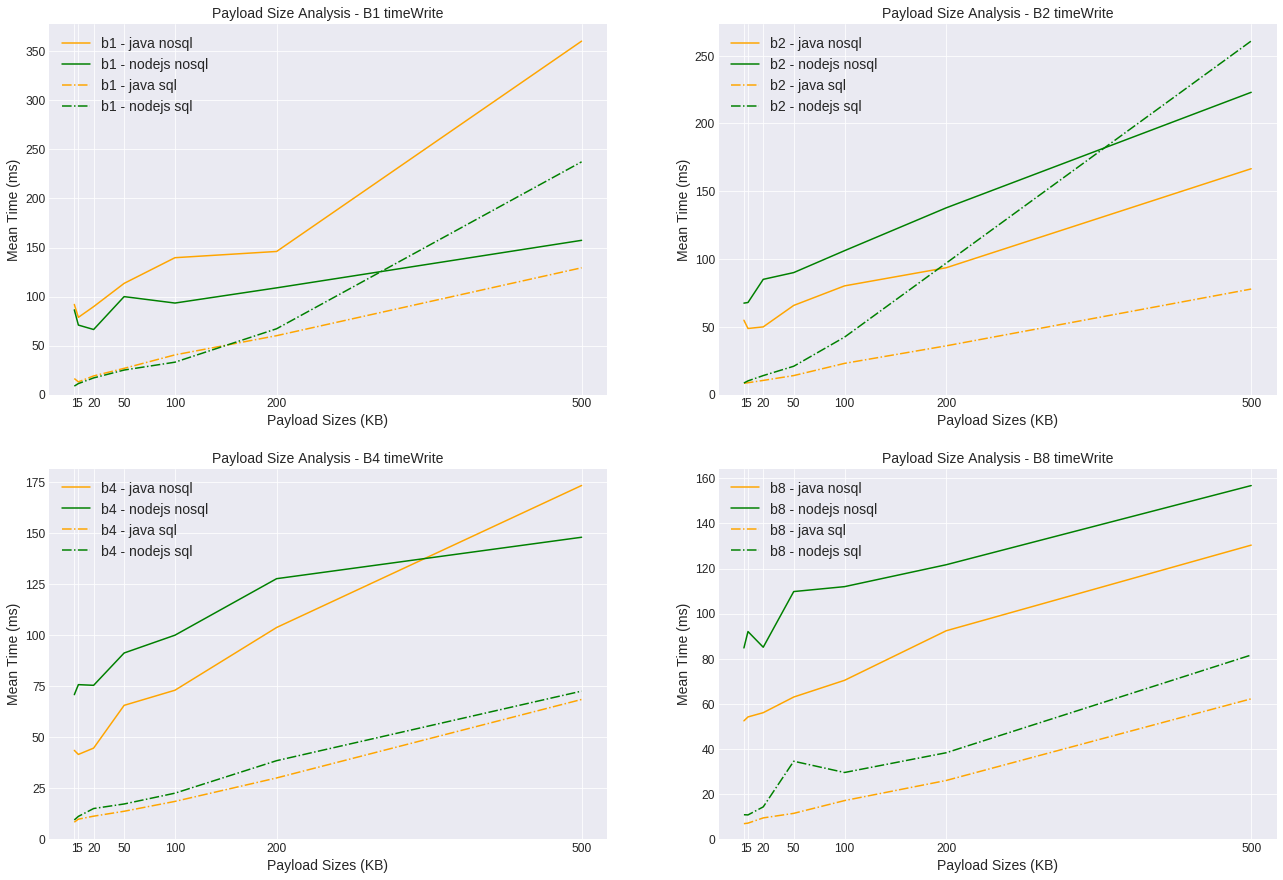

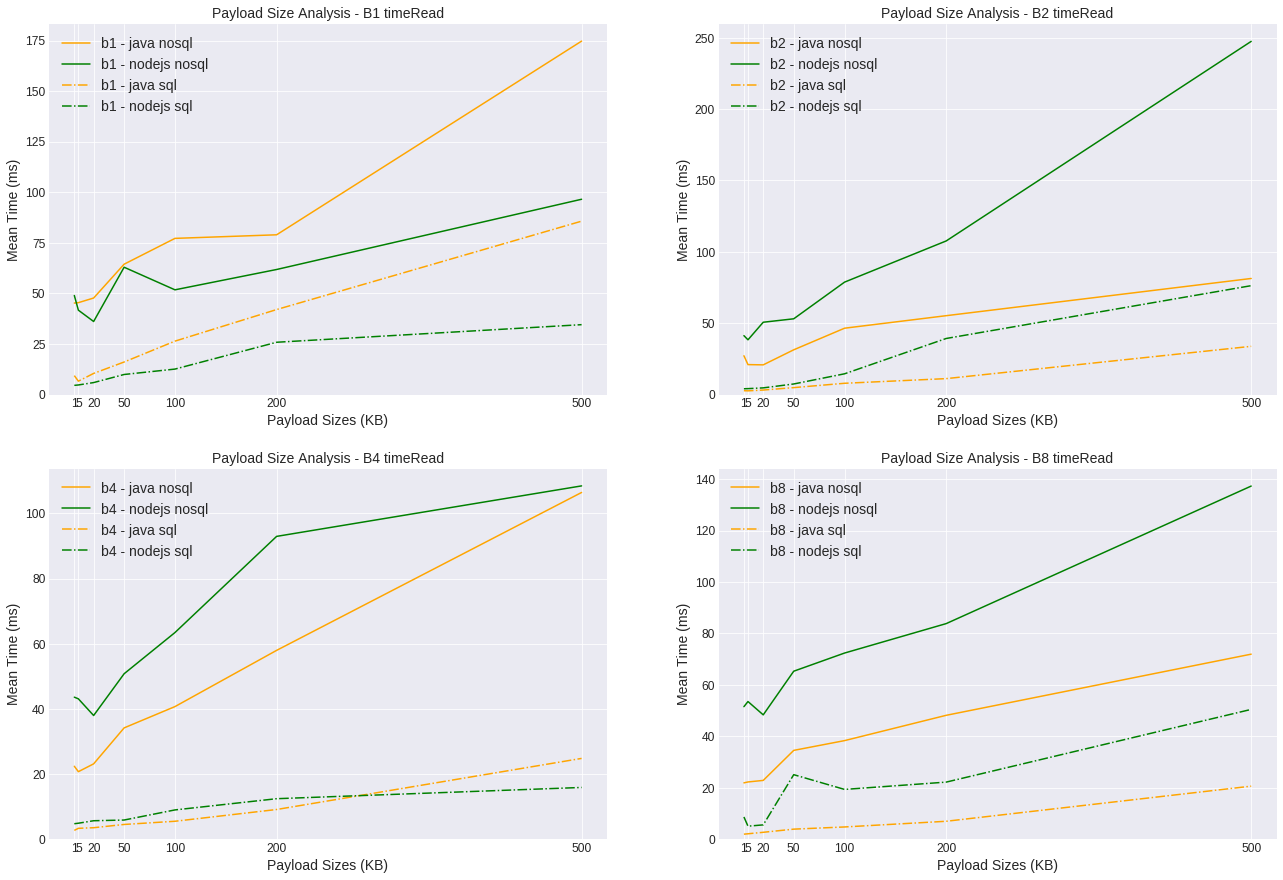

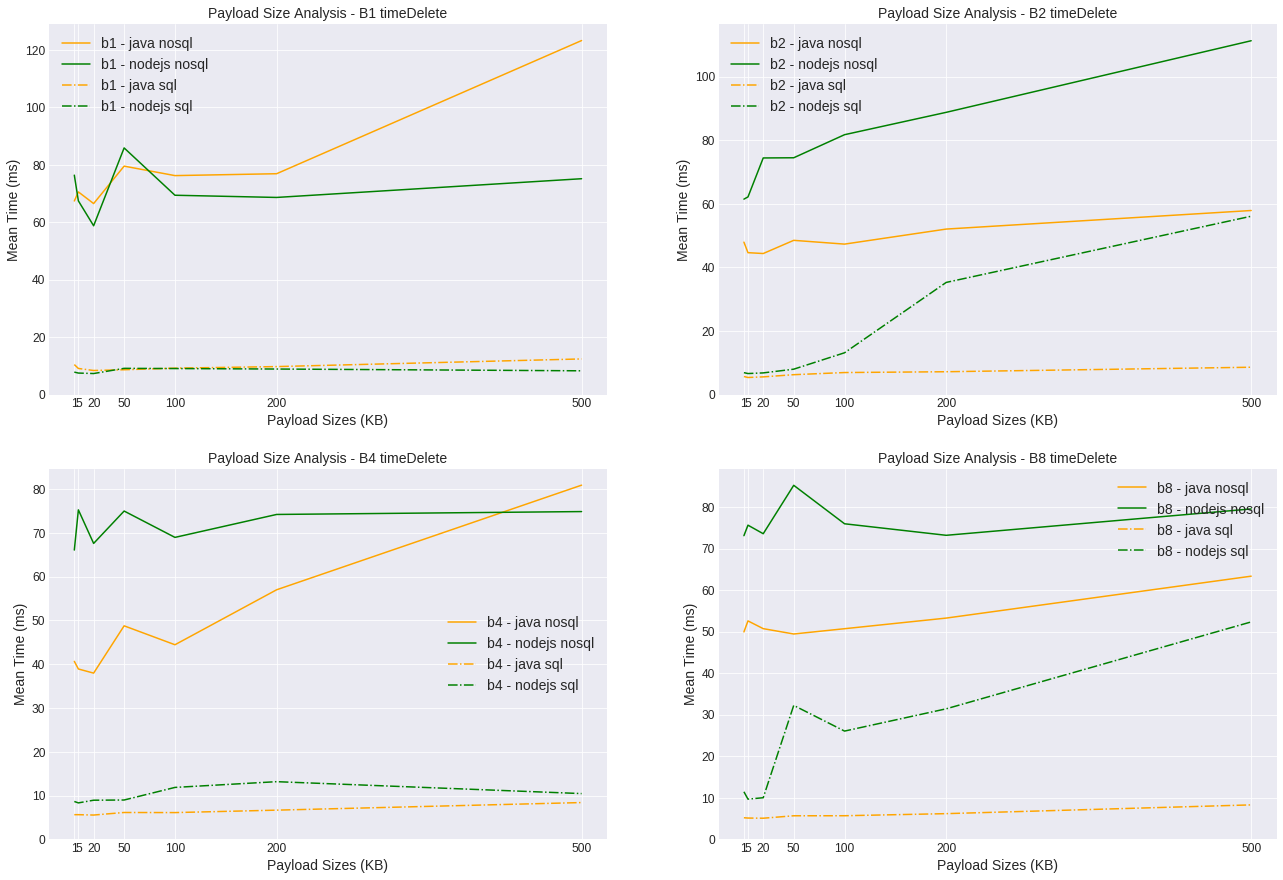

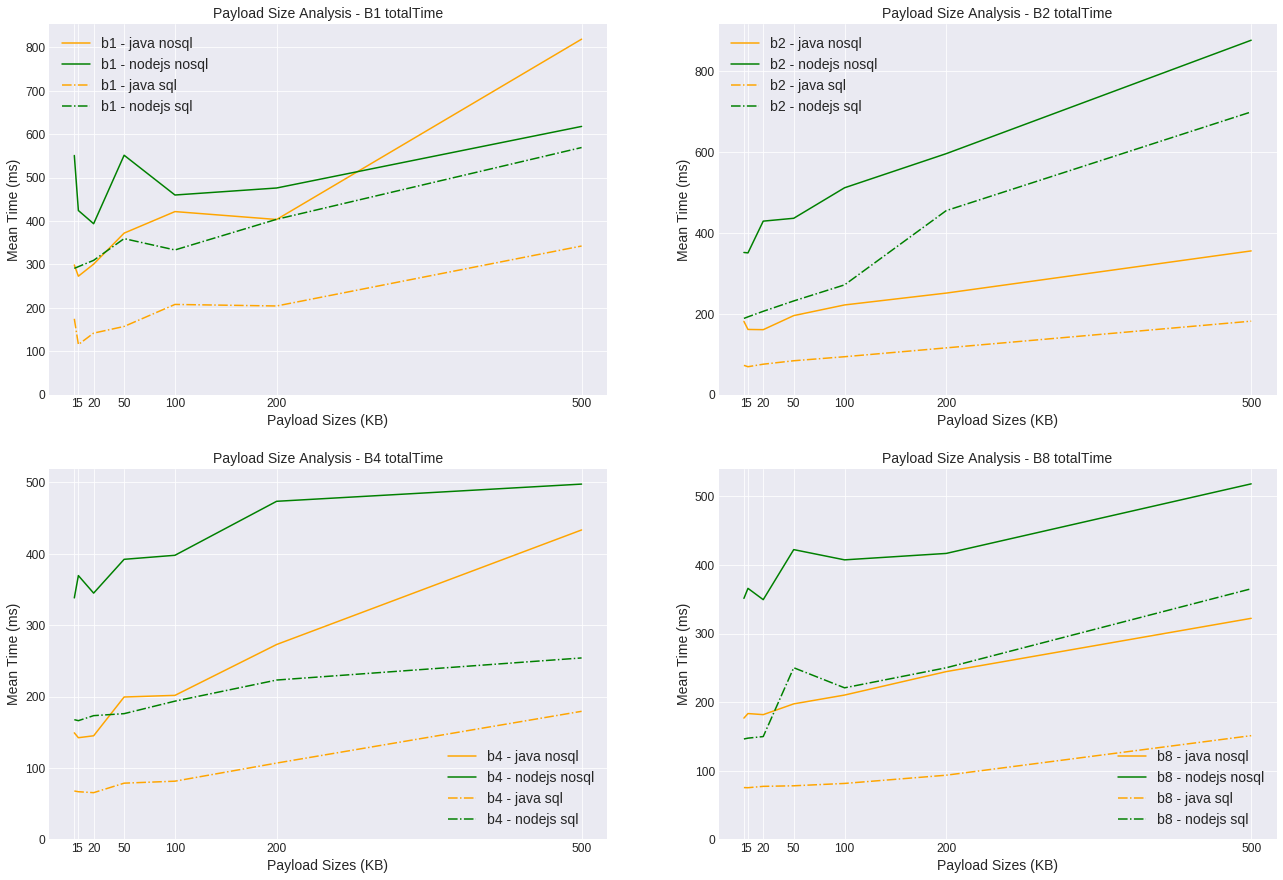

In [4]:
plot_request_sizes('timeWrite')
plot_request_sizes('timeRead')
plot_request_sizes('timeDelete')
plot_request_sizes('totalTime')

### Frequency Plots

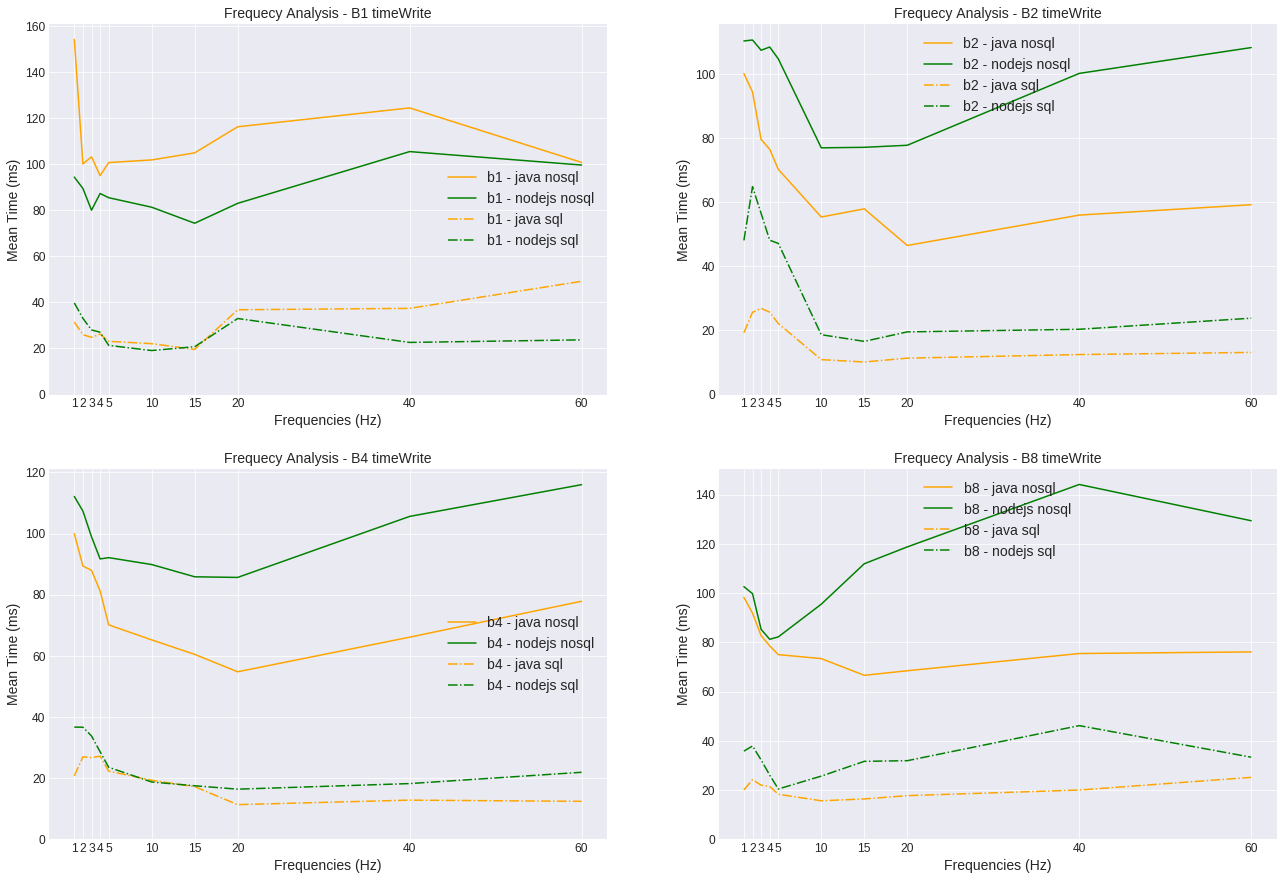

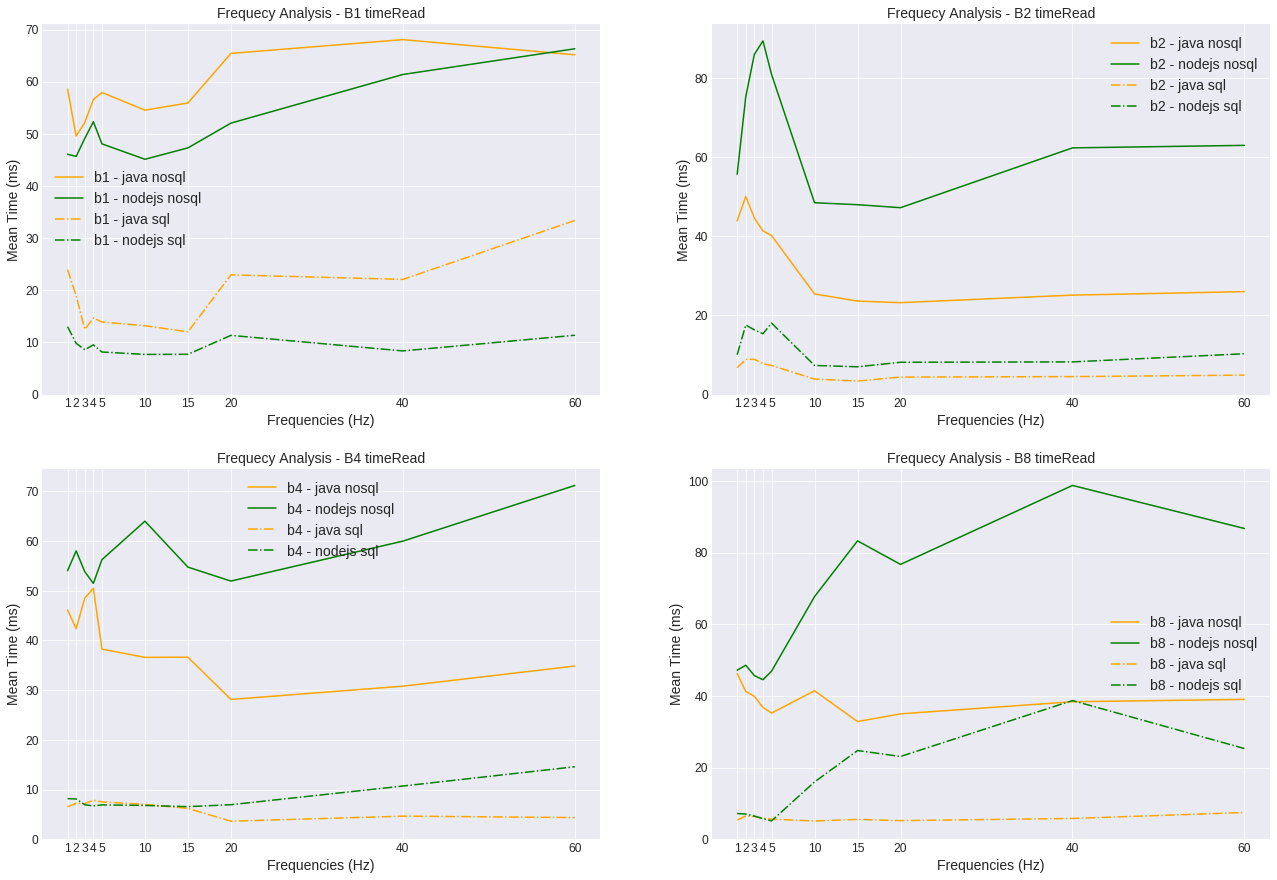

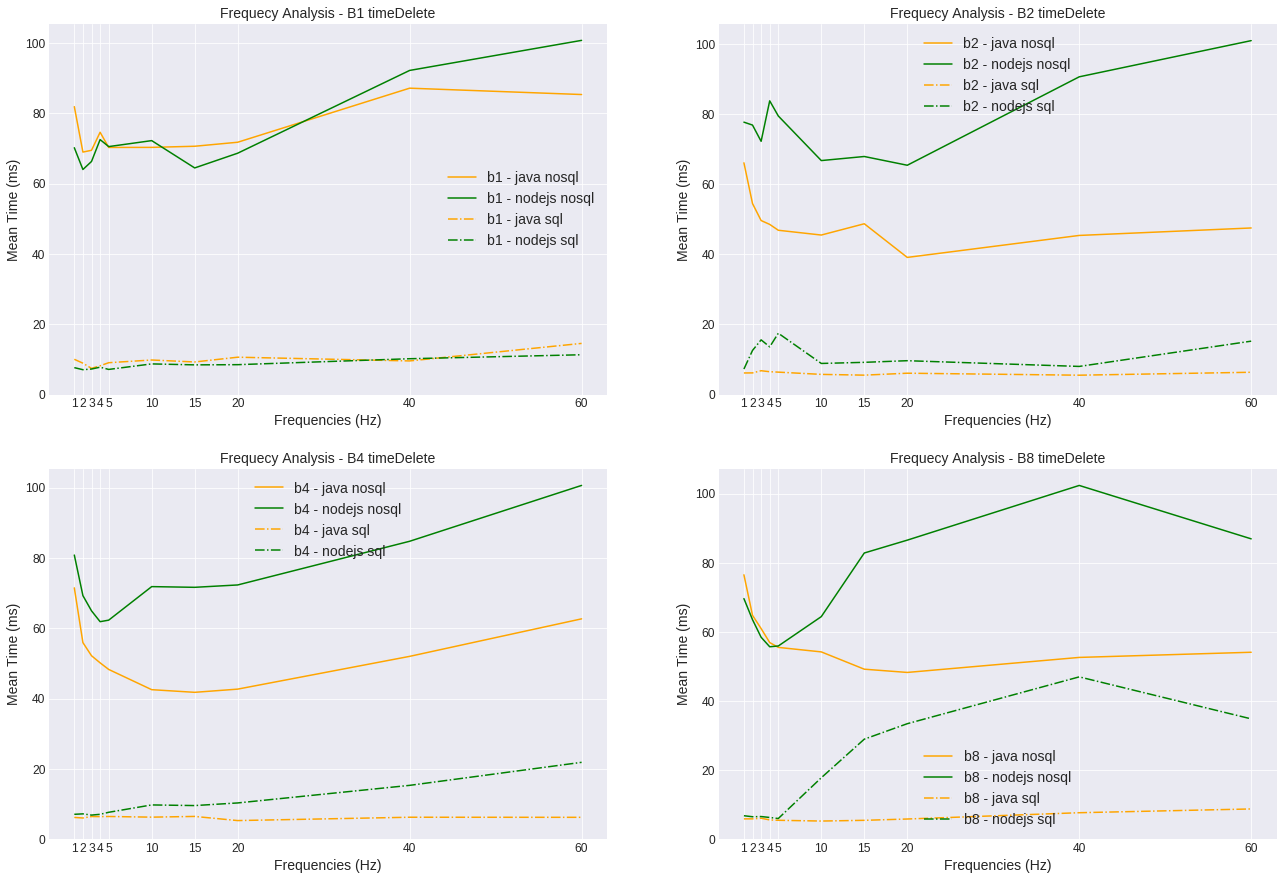

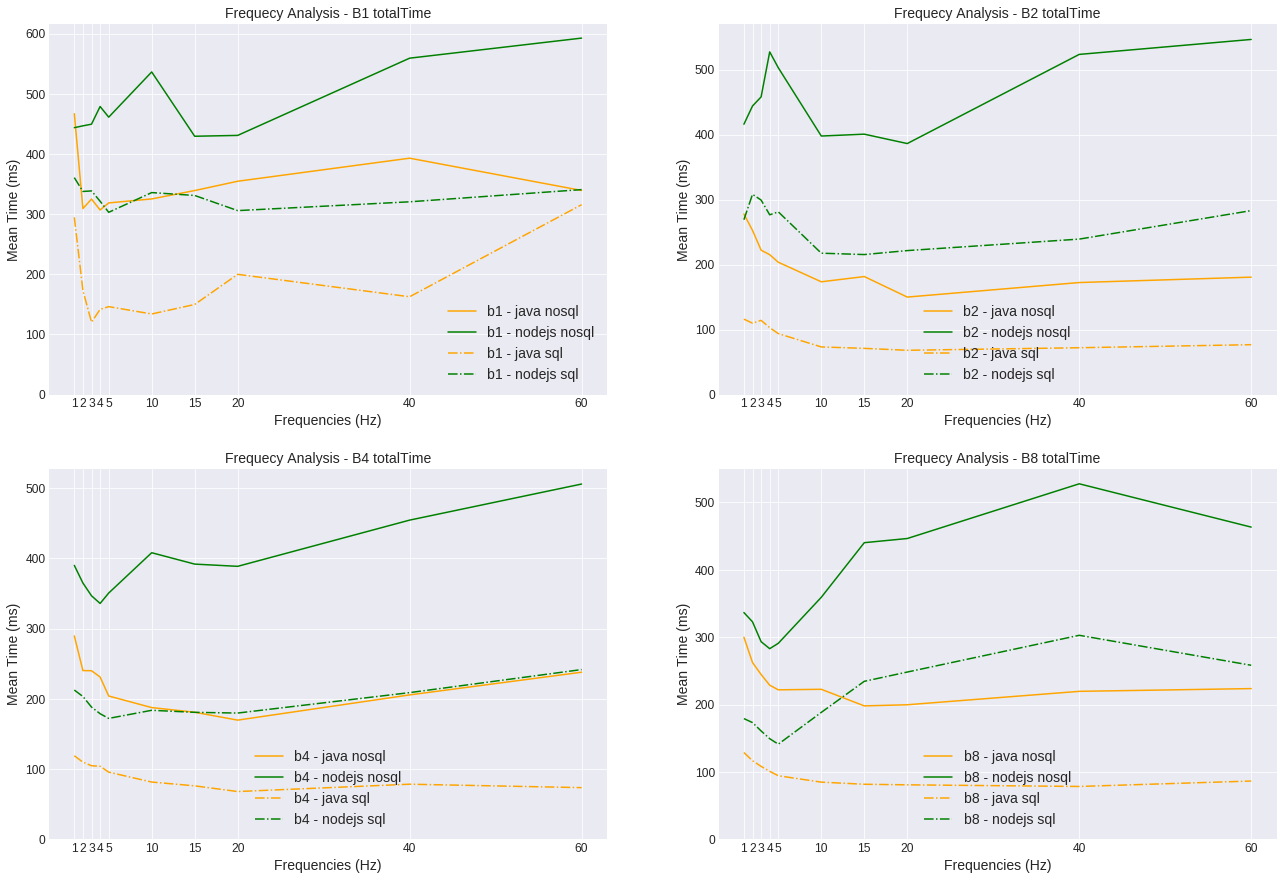

In [5]:
plot_frequencies('timeWrite')
plot_frequencies('timeRead')
plot_frequencies('timeDelete')
plot_frequencies('totalTime')